In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv("/content/sample_data/movies.csv")
ratings = pd.read_csv("/content/sample_data//ratings.csv")

***Sample "Movies" Data***

In [2]:
movies.shape

(9742, 3)

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


***Sample Ratings***

In [13]:
ratings.shape

(100836, 4)

In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


***DATA PRE-PROCESSING***

*To make the interpretation more simple we modify the ratings dataframe with rows forming  MOvie-id and columns  forming  user-id and the Matrix will be of  the ratings*

In [4]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,4.5,3.5,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,2.5,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.5,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.0,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
print('Total_movies , Total_users = ' ,final_dataset.shape[0] ,',', final_dataset.shape[1])

Total_movies , Total_users =  9724 , 610


*To flag the Non rated movies, ratings are replaced  by 0*

In [5]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


***Removing Noise from  the data***

*In the real-world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. We wouldn’t want movies that were rated by a small number of users because it’s not credible enough. Similarly, users who have rated only a handful of movies should also not be taken into account.*

In [6]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

Text(0, 0.5, 'No. of users voted')

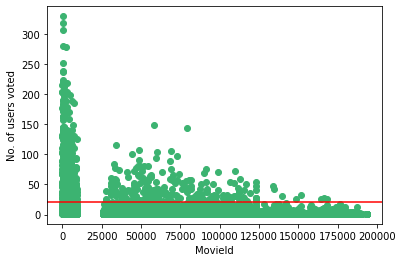

In [29]:
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

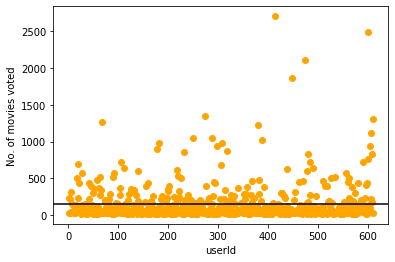

In [44]:
plt.scatter(no_movies_voted.index,no_movies_voted.values,color='orange')
plt.axhline(y=150,color='k')
plt.xlabel('userId')
plt.ylabel('No. of movies voted')
plt.show()

**With the  above visualisations I define  a  valid user and a valid movie**

1.   A valid movie should must be rated by at  least 10 users
2.   A valid user should must  rate at  least 150 movies

In [7]:
### movies that have been reviewed at least by 10  critics
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
### users who have reviewed at least 150  movies
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 150].index]
final_dataset.shape

(2121, 173)

***Final datset have 2121 movies reviewed by 173 users***

In [8]:
final_dataset.head()

userId,1,4,6,7,18,19,20,21,28,33,41,42,45,50,51,57,62,63,64,66,68,73,74,80,82,84,89,91,95,103,104,105,111,117,119,122,125,132,135,139,...,480,483,484,489,495,509,514,517,520,522,525,527,534,552,555,560,561,562,563,564,567,570,572,573,577,580,586,587,590,594,596,597,599,600,603,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,3.5,4.0,0.0,3.5,0.0,3.0,0.0,0.0,4.0,3.0,0.0,5.0,0.0,5.0,4.0,4.0,2.5,4.5,0.0,0.0,2.5,0.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,2.0,4.0,0.0,...,3.0,4.0,4.5,0.0,0.0,4.0,4.0,4.0,0.0,3.0,4.0,0.0,4.0,0.0,4.0,3.0,4.0,4.5,0.0,0.0,3.5,4.0,4.0,5.0,0.0,3.0,0.0,5.0,4.0,0.0,4.0,4.0,3.0,2.5,4.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,4.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,4.0,3.0,0.0,0.0,3.0,0.0,4.0,4.0,0.0,3.0,0.0,...,3.0,4.0,2.5,2.5,0.0,0.0,0.0,3.0,0.0,0.0,3.5,4.0,4.5,0.0,0.0,0.0,4.0,0.0,2.5,0.0,0.0,3.5,0.0,4.5,0.0,0.0,4.0,0.0,2.5,4.0,0.0,0.0,2.5,4.0,0.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,3.5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,3.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,2.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,4.0,0.0,0.0,3.0,4.5,0.0,4.5,0.0,4.0,0.0,0.0,0.0,3.5,4.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.0,4.0,0.0,0.0,3.5,0.0,0.0,3.0,4.5,0.0,4.0,0.0,0.0,0.0,0.0,5.0


In [11]:
final_datasetTranspose = final_dataset.T

In [14]:
corr_M = final_datasetTranspose.corr()


In [17]:
corr_M.head()

movieId,1,2,3,5,6,7,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,31,32,34,36,39,41,44,45,46,47,48,50,52,58,60,...,122906,122912,122916,122918,122920,122922,122924,122926,128360,134130,134368,134853,135143,135536,135569,135887,136020,136864,137857,138036,139385,139644,140110,142488,143355,148626,152077,152081,157296,158238,159093,164179,166528,168250,168252,174055,176371,177765,179819,187593
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101430,0.044514,0.069938,0.081441,-0.041688,0.007191,0.173924,0.139523,0.167156,0.040125,-0.014602,0.103943,0.075392,0.050130,0.126196,0.071247,0.153877,-0.020986,0.115558,0.080198,0.006433,0.001265,0.045651,-0.063333,-0.047294,0.200919,0.295080,0.005343,0.187144,0.012332,0.099117,0.065669,-0.054924,0.115967,0.077739,0.142633,0.014079,-0.007668,0.148549,...,0.020359,-0.007433,-0.010264,-0.059438,0.066415,-0.020273,0.068767,0.015131,-0.071744,-0.011371,-0.108956,0.168436,-0.059013,0.037036,0.094085,-0.072026,0.081640,0.065972,0.115625,0.021660,-0.026152,0.037748,-0.130717,0.051231,-0.018564,0.035628,-0.021679,0.011892,0.060910,0.001699,-0.049973,0.049044,-0.009716,-0.017494,0.012945,0.020799,0.018471,-0.106589,0.021408,-0.073025
2,0.101430,1.000000,0.223259,0.199274,0.067576,0.181324,0.013691,0.162956,0.056710,0.222567,-0.082384,0.106927,0.014891,0.006328,0.113216,0.317392,0.073998,-0.092993,0.089944,0.090509,0.079209,-0.125705,0.168739,0.020103,-0.010912,0.152146,0.079826,0.171450,0.014363,0.035513,0.098446,0.216031,-0.119261,0.199166,0.211181,0.358944,-0.119576,-0.056991,-0.048792,0.329160,...,0.155826,0.218805,0.195085,0.246966,0.222363,0.264617,0.204159,0.175481,0.092377,0.043836,0.034203,0.168650,0.114962,0.115766,0.140366,0.023156,0.185703,0.142257,0.148598,0.064595,0.061550,-0.066209,0.011063,0.032276,0.174897,0.021142,0.035357,0.185262,-0.001605,0.183685,-0.004276,0.176645,0.204745,0.045285,0.212058,0.071197,0.211584,0.013308,0.160032,0.196521
3,0.044514,0.223259,1.000000,0.296935,0.063691,0.326213,0.030242,0.162504,0.239930,0.123833,-0.069982,0.294086,0.223941,0.119519,0.023402,0.204996,0.013102,0.210614,0.353749,-0.009810,0.259967,0.034973,0.188013,-0.004617,-0.021323,0.158163,0.088874,0.085776,0.114351,0.152110,0.209481,0.085905,0.064684,0.168466,0.141566,0.152645,0.017209,0.049932,-0.006950,0.258006,...,-0.003425,-0.083248,-0.004590,-0.012229,-0.084229,-0.028875,-0.042518,-0.016469,-0.050178,-0.038870,-0.075726,-0.072982,-0.065460,0.002271,-0.060278,-0.067251,-0.049336,-0.063295,0.044880,-0.104170,-0.045203,0.013367,-0.039252,0.004890,0.012670,-0.073821,-0.058748,-0.054865,-0.017798,-0.049332,-0.092252,-0.027976,-0.038841,-0.065630,-0.035499,0.067177,0.035897,-0.064380,0.029407,-0.082903
5,0.069938,0.199274,0.296935,1.000000,0.046396,0.445591,-0.043206,0.079422,0.230586,0.043178,0.099018,0.243692,0.118603,0.246336,0.243271,0.260537,0.013111,0.136410,0.134738,0.043442,0.186576,0.040139,0.363851,-0.003185,0.047812,0.291888,0.083316,0.200269,0.194718,0.216770,0.216833,0.001130,0.105846,0.292932,0.064998,0.246334,-0.006728,0.130501,-0.094657,0.346935,...,-0.020474,-0.068849,-0.036137,0.046246,-0.013448,0.001098,-0.038482,-0.047593,-0.069387,0.011331,0.056662,0.073625,-0.037349,0.121519,0.011883,0.042334,0.039233,0.021809,0.040399,-0.008036,0.015035,-0.027475,0.109857,-0.013710,-0.022760,0.071602,-0.031057,-0.006033,0.128050,-0.054786,0.036517,0.013317,0.010180,0.010969,-0.043965,0.002669,0.005298,-0.053244,0.001629,-0.068564
6,0.081441,0.067576,0.063691,0.046396,1.000000,0.057380,0.045558,0.307887,0.196196,0.155301,0.246010,0.079040,0.402447,0.045354,0.059811,0.007348,0.106130,0.257761,0.230302,0.266671,-0.023708,0.231788,0.204659,-0.046851,0.103152,0.184563,0.371624,0.042171,0.207989,0.011846,0.308206,0.174420,0.228417,0.006606,0.326160,-0.100695,0.300363,0.141829,0.001312,0.118992,...,0.013096,0.075835,0.093016,0.094026,0.093724,0.080435,0.139260,0.090311,0.078869,-0.012409,-0.097115,0.023469,0.060739,0.038660,0.094351,-

In [70]:
def getrecommendation(movie_name):
  movie_list = movies[movies['title'].str.contains(movie_name)]
  x = []
  if  len(movie_list):
    movidx = movie_list.iloc[0]['movieId']  #### picks the M_id in the first row i.e most matching
    col = corr_M[movidx].nlargest(10).index    #### top 10  picks having  the highest correlation
    for i in col:
      ind = movies[movies['movieId'] == i].index  #### get index of  these picks from  movies  file
      x.append(movies.iloc[ind]['title'].values[0])
    return x
  else:
    return 'No such movie in my database'

In [71]:
getrecommendation('Iron Man')

['Iron Man (2008)',
 'Dark Knight, The (2008)',
 'Avatar (2009)',
 'WALL·E (2008)',
 'Avengers, The (2012)',
 'Kung Fu Panda (2008)',
 'Iron Man 2 (2010)',
 'Watchmen (2009)',
 'Up (2009)',
 'Incredible Hulk, The (2008)']